In [1]:
import os
os.chdir('../')

In [52]:
import data
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
train_df = data.train_df('local')
test_df = data.test_df('local')
#targets = data.target_indices('local', 'cluster_sessions_no_numerical_reference')

In [33]:
full_df = pd.concat([train_df,test_df])
del train_df
del test_df

In [35]:
full_no_num_df = full_df.groupby(['session_id','user_id'], group_keys=False)\
            .filter(lambda g: g[(g.action_type != 'clickout_item') & g.reference.fillna('').str.isnumeric()].shape[0] == 0 )

In [ ]:
full_no_num_df.shape

In [36]:
full_no_num_df.head(30)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
2787,54O7EJ6XHJ62,1a2fea0f5916a,1541062867,1,search for poi,Jomtien Beach,DK,"Pattaya, Thailand",desktop,NaN,NaN,NaN
2788,54O7EJ6XHJ62,1a2fea0f5916a,1541063009,2,change of sort order,interaction sort button,DK,"Pattaya, Thailand",desktop,NaN,NaN,NaN
2789,54O7EJ6XHJ62,1a2fea0f5916a,1541063010,3,change of sort order,price only,DK,"Pattaya, Thailand",desktop,NaN,NaN,NaN
2790,54O7EJ6XHJ62,1a2fea0f5916a,1541063010,4,filter selection,Sort by Price,DK,"Pattaya, Thailand",desktop,Sort by Price,NaN,NaN
3293,6X2CR948CGX2,8d772912b469f,1541081854,1,search for destination,"São Leopoldo, Brazil",BR,"São Leopoldo, Brazil",mobile,NaN,NaN,NaN
4434,90FQT0FP24AF,2bafe6266c699,1541083013,1,search for destination,"Machala, Ecuador",EC,"Machala, Ecuador",mobile,NaN,NaN,NaN
4468,95RE2CKD0MYZ,95243099efc5e,1541090862,1,search for destination,"Stuttgart, Germany",DE,"Stuttgart, Germany",mobile,NaN,NaN,NaN
4951,ALEQ04E4CPRS,0ef5c7c9e5b4f,1541037312,1,search for destination,"São Paulo, Brazil",BR,"São Paulo, Brazil",mobile,NaN,NaN,NaN
6748,GZSLNP9QC9YR,5b1a8ecaa5a3c,1541113029,1,search for destination,"Cornélio Procópio, Brazil",BR,"Cornélio Procópio, Brazil",mobile,NaN,NaN,NaN
7089,HOPD37D2L07A,a0b386a693830,1541038758,1,search for destination,"San Cristobal, Venezuela",US,"San Cristobal, Venezuela",mobile,NaN,NaN,NaN


## Count the sessions with no numerical reference

In [72]:
tot_sessions_count = full_df.groupby(['session_id','user_id']).first().shape[0]

sessions_no_num_ref_df = full_no_num_df.groupby(['session_id','user_id']).first()
session_no_num_ref_count = sessions_no_num_ref_df.shape[0]

session_no_num_ref_count / tot_sessions_count

0.08175613055681225

In [111]:
session_no_num_ref_count

74454

In [73]:
sessions_no_num_ref_df.head()

,,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
session_id,user_id,,,,,,,,,,
00019322edd5d,JFZVBNZUIFR2,1541235460,1,search for destination,"London, United Kingdom",GR,"London, United Kingdom",desktop,Best Value,NaN,NaN
0001fe0007954,38DG07L4M0KO,1541511553,1,search for poi,Ginza Station,JP,"Tokyo, Japan",tablet,Sort by Price,103501|2111996|2350650|4675284|6914122|8788590...,73|83|91|91|91|97|95|90|103|103|61|105|61|115|...
00028291d1704,9NKQVI9VCA85,1541509665,1,clickout item,NaN,JP,"Tokyo, Japan",desktop,NaN,103633|106481|1321068|4333514|508561|103600|95...,58|70|56|73|63|124|45|36|132|65|63|36|74|84|73...
00030305c6aa7,OVVHIN6EWE2G,1541516642,1,search for destination,"Barcelona, Spain",FI,"Barcelona, Spain",desktop,5 Star|4 Star|3 Star|Hotel|Motel|Resort|Hostal...,NaN,NaN
00038b7b71f53,ZG1MSEZGQYVP,1541538688,1,clickout item,Satisfactory Rating,IN,"Baga, India",mobile,Satisfactory Rating,4926658|5069764|9630736|4603404|6717548|453013...,47|32|17|78|22|37|64|23|213|84|23|40|46|56|51|...


## Sessions length

In [97]:
sessions_length_df = full_no_num_df.groupby(['session_id','user_id']).apply(lambda g: pd.Series({'session_length': g.shape[0]}))

In [110]:
sessions_length_df.describe()

,session_length
count,74454.000000
mean,2.192736
std,2.811572
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,76.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1592634a8>]],
      dtype=object)

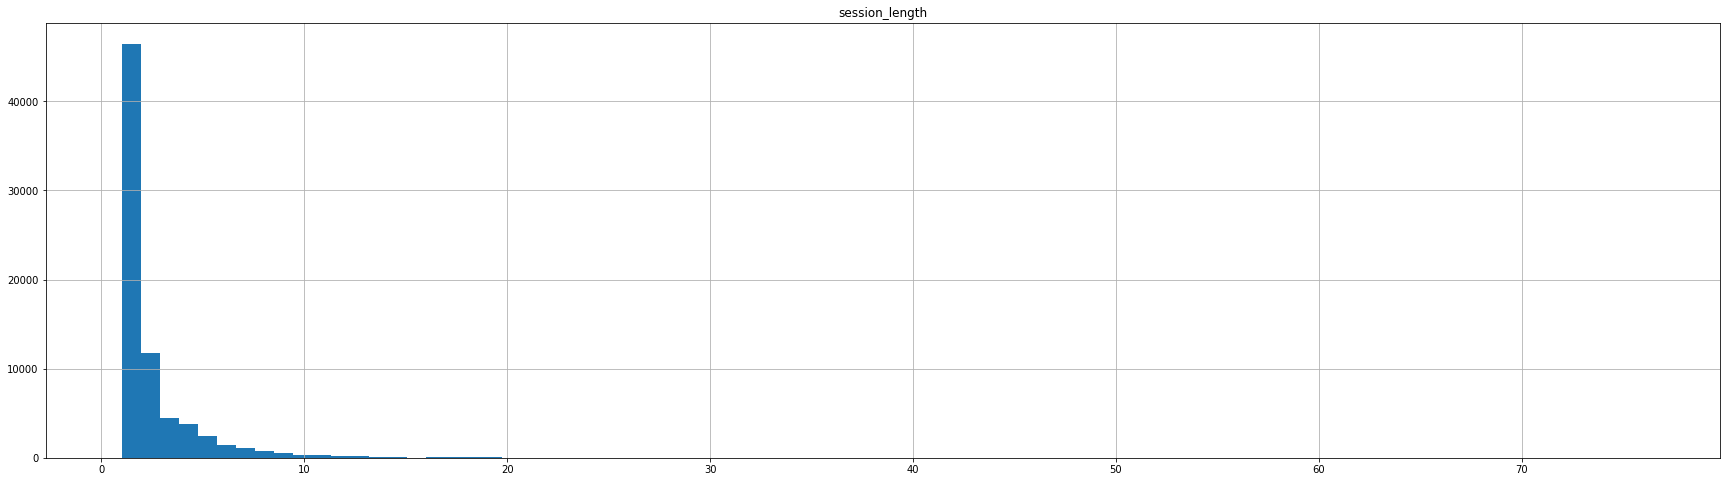

In [109]:
sessions_length_df.hist(bins=80)

## Action type distribution for cluster (C)

In [65]:
actions_hist = dict([(f, 0) for f in full_no_num_df.action_type.unique()])
for a in full_no_num_df.action_type.values:
    actions_hist[a] += 1

<BarContainer object of 6 artists>

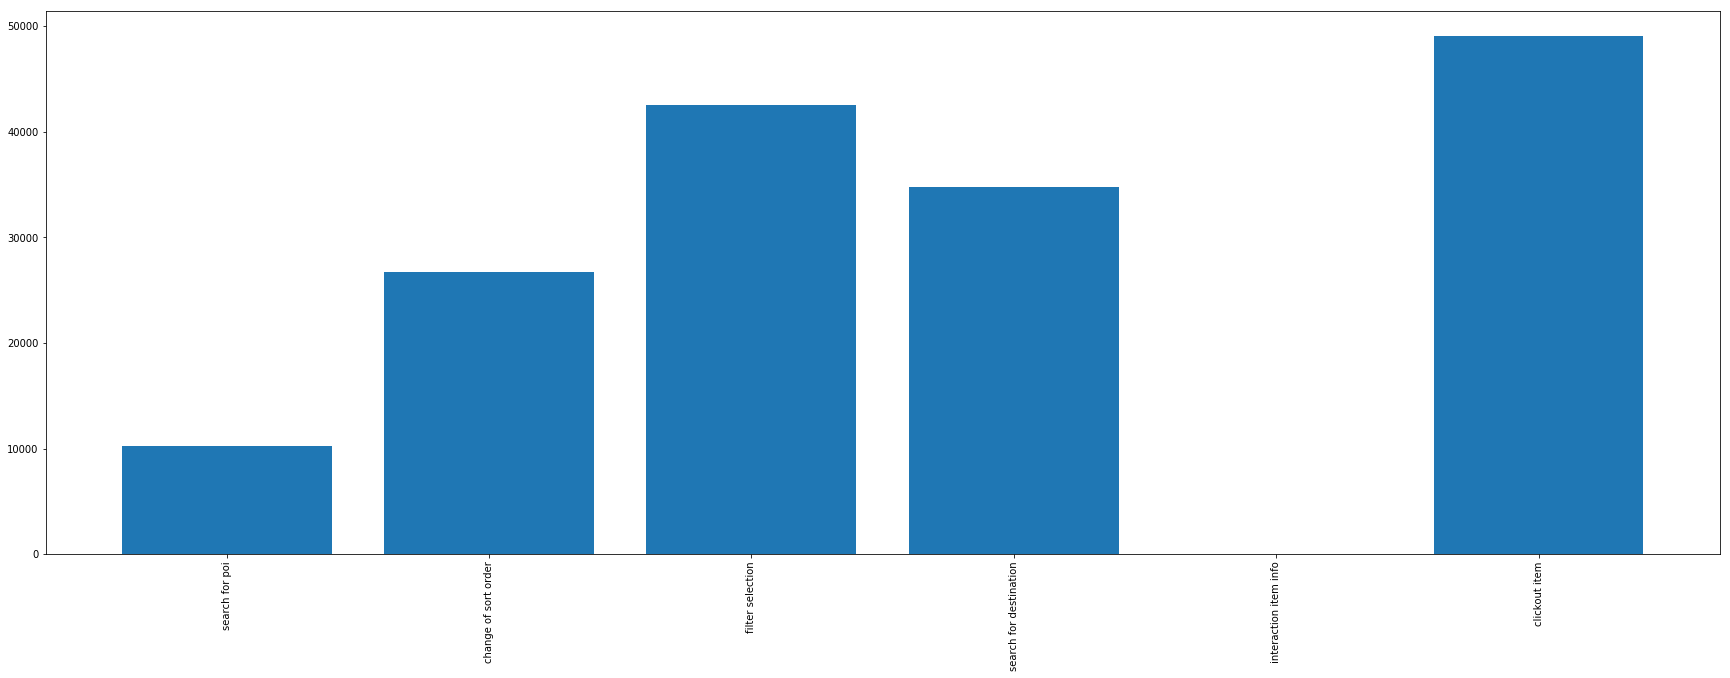

In [68]:
plt.rcParams["figure.figsize"] = (30,10)

plt.figure()
plt.xticks(rotation='vertical')
plt.bar(actions_hist.keys(), actions_hist.values())

### P.S.: the 10 'interaction item info' rows contain 'unknown'  (so not a numerical reference)

In [69]:
actions_hist

{'search for poi': 10244,
 'change of sort order': 26707,
 'filter selection': 42513,
 'search for destination': 34750,
 'interaction item info': 10,
 'clickout item': 49034}

In [71]:
full_no_num_df[full_no_num_df.action_type == 'interaction item info']

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
5973514,MIBQE1AJD39V,60160f000078c,1541041181,1,interaction item info,unknown,AR,"Las Vegas, USA",desktop,NaN,NaN,NaN
6155922,X4Y19FTN2H1N,7ad08402973f9,1541260709,1,interaction item info,unknown,CO,"Bogotá, Colombia",desktop,NaN,NaN,NaN
10581576,9C5J84TC9881,530f5729b9b5d,1541404993,4,interaction item info,unknown,TW,"Taichung City, Taiwan",desktop,NaN,NaN,NaN
11025026,WYF09M8C0P2I,22da09dfa339e,1541061776,1,interaction item info,unknown,SE,"Dubai, United Arab Emirates",desktop,NaN,NaN,NaN
13610423,B7KSHIFNFO7N,5baecbc71166f,1541203796,2,interaction item info,unknown,US,"Mobile, USA",desktop,NaN,NaN,NaN
13722849,ZHSXYR765FQW,a47fd4c12ecae,1541446426,9,interaction item info,unknown,BE,"The Hague, Netherlands",desktop,NaN,NaN,NaN
1187381,G264KAM7FPO5,f9881e39ec5f0,1541505122,3,interaction item info,unknown,DE,"Lenggries, Germany",desktop,NaN,NaN,NaN
2766264,HC0H340M4CJL,03e9aa1e674f1,1541496235,1,interaction item info,unknown,MX,"Yautepec de Zaragoza, Mexico",desktop,NaN,NaN,NaN
9884045,N75TD5T0M5SY,becc91682de3d,1541530528,1,interaction item info,unknown,CO,"Villeta, Colombia",desktop,NaN,NaN,NaN
11006983,EPF2AWBB9VOA,cd134f9880c40,1541504174,4,interaction item info,unknown,FR,"Paris, France",desktop,NaN,NaN,NaN


## Filters distribution

In [43]:
filter_actions_df = full_no_num_df[full_no_num_df.action_type == 'filter selection']

In [85]:
filter_hist = dict([(f, 0) for f in filter_actions_df.reference.unique()])
for f in filter_actions_df.reference.values:
    filter_hist[f] += 1

<BarContainer object of 126 artists>

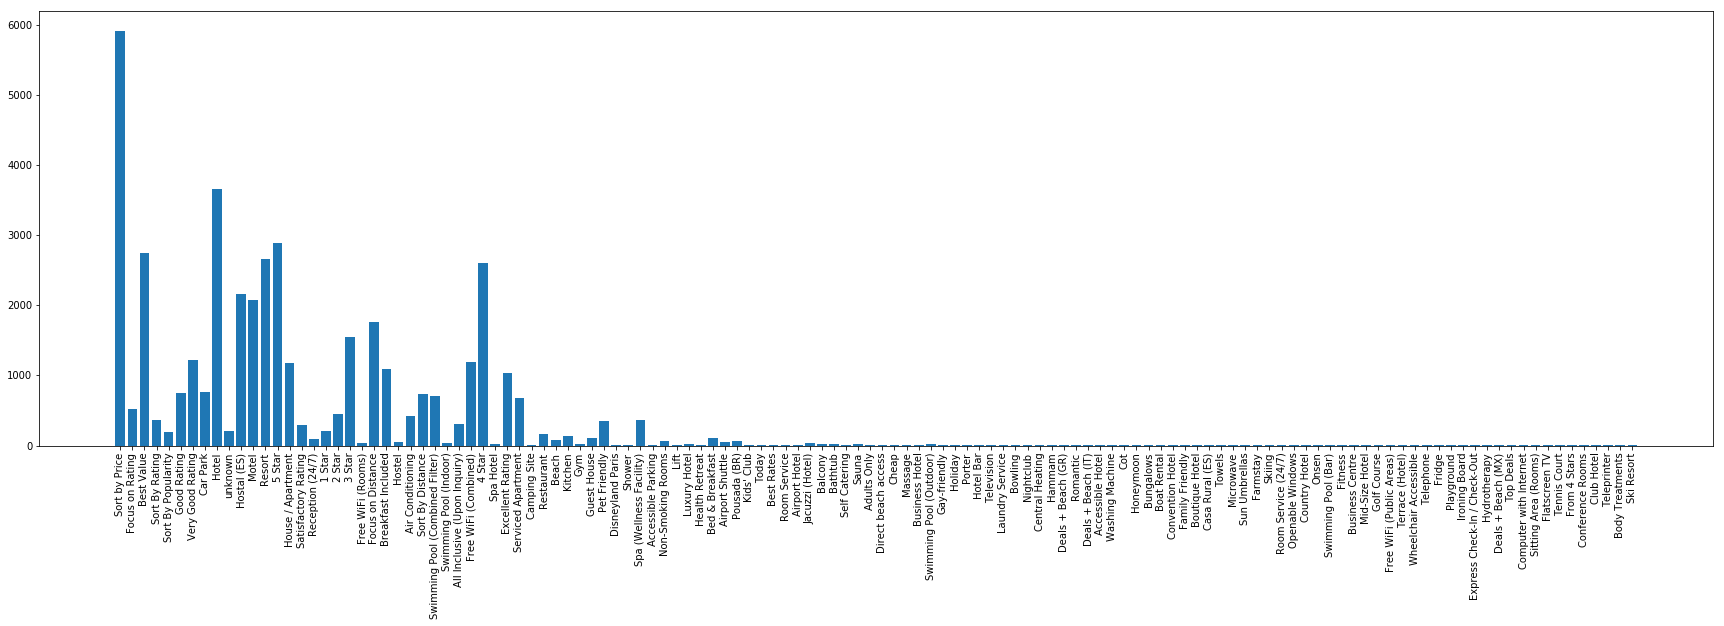

In [70]:
plt.rcParams["figure.figsize"] = (30,8)

plt.figure()
plt.xticks(rotation='vertical')
plt.bar(filter_hist.keys(), filter_hist.values())

## Active filters distribution

In [90]:
active_filter_hist = dict()
for filters in filter_actions_df[filter_actions_df.current_filters.notnull()].current_filters.values:
    for f in filters.split('|'):
        if f in active_filter_hist:
            active_filter_hist[f] += 1
        else:
            active_filter_hist[f] = 0

<BarContainer object of 125 artists>

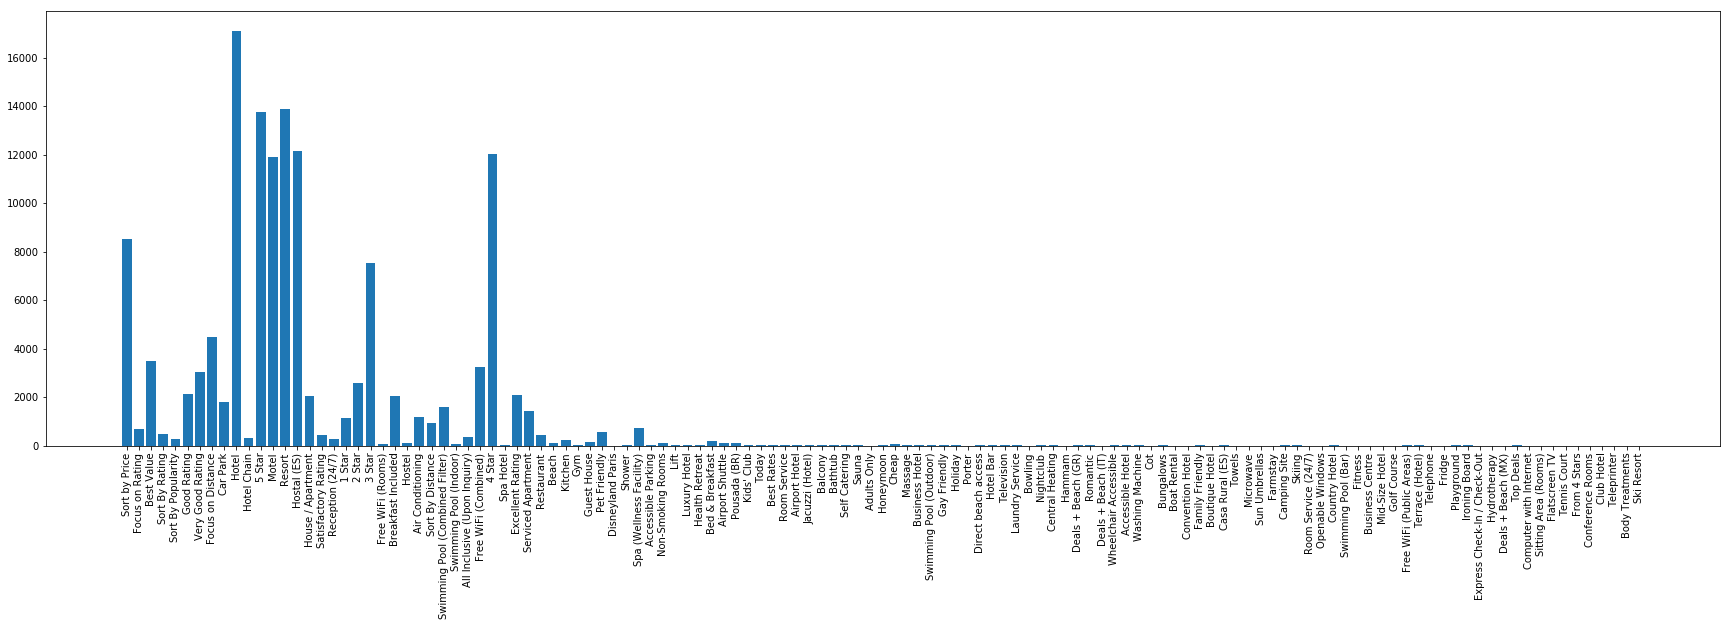

In [92]:
plt.rcParams["figure.figsize"] = (30,8)

plt.figure()
plt.xticks(rotation='vertical')
plt.bar(active_filter_hist.keys(), active_filter_hist.values())

## Clickouts impression position distribution

In [ ]:
clickout_actions_df = full_no_num_df[full_no_num_df.action_type == 'clickout item']